In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
from sklearn.datasets import make_blobs

In [204]:
X,y=make_blobs(n_samples=1000,n_features=2,centers=3,random_state=23)

In [206]:
X

array([[-5.37039106,  3.47555168],
       [ 5.84161203, -3.98182959],
       [ 1.76127766,  9.39696306],
       ...,
       [ 6.14147823, -5.75491603],
       [-5.45330839,  1.75599573],
       [-0.21966953,  8.72922042]])

In [208]:
X.shape

(1000, 2)

In [210]:
df=pd.DataFrame(X)

In [212]:
df

,0,1
0,-5.370391,3.475552
1,5.841612,-3.981830
2,1.761278,9.396963
3,-5.246640,5.602234
4,5.463128,-3.089388
...,...,...
995,-5.047968,3.186992
996,5.494799,-6.487077
997,6.141478,-5.754916
998,-5.453308,1.755996


<Axes: >

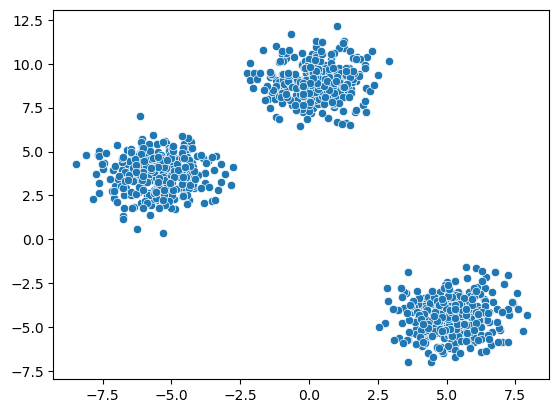

In [214]:
sns.scatterplot(x=X[:,0],y=X[:,1])

<Axes: xlabel='0', ylabel='1'>

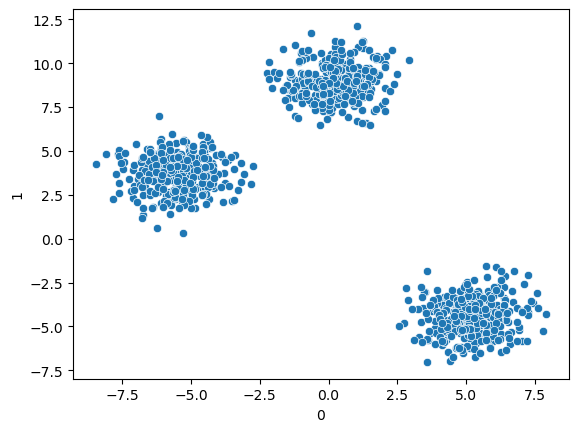

In [216]:
sns.scatterplot(x=df[0],y=df[1])

<Axes: xlabel='0', ylabel='1'>

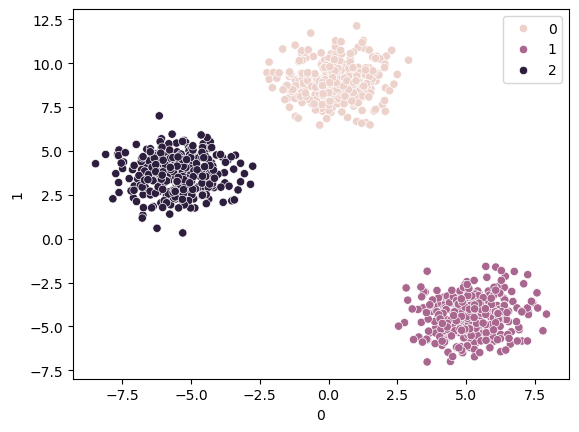

In [218]:
sns.scatterplot(x=df[0],y=df[1],hue=y)

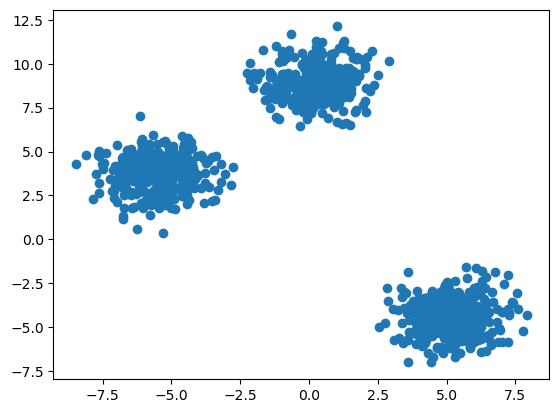

In [220]:
plt.scatter(X[:,0],X[:,1])

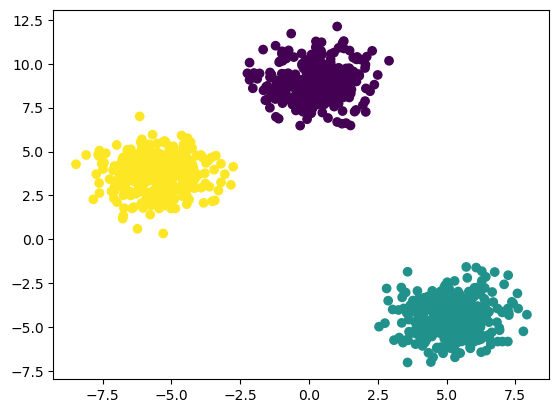

In [222]:
plt.scatter(X[:,0],X[:,1],c=y)

In [224]:
from sklearn.model_selection import train_test_split

In [226]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=.33)

In [228]:
from sklearn.cluster import KMeans

## Manula way 
to find Elbow method to select the K value

In [231]:
wcss=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(X_train)
    wcss.append(km.inertia_)

C:\Users\p4pri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\p4pri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\p4pri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\p4pri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [233]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1181.0692876765868,
 1015.0724141927653,
 901.1468278895117,
 878.2804595616534,
 671.663427842855,
 579.4057266147835,
 534.6606741249567]

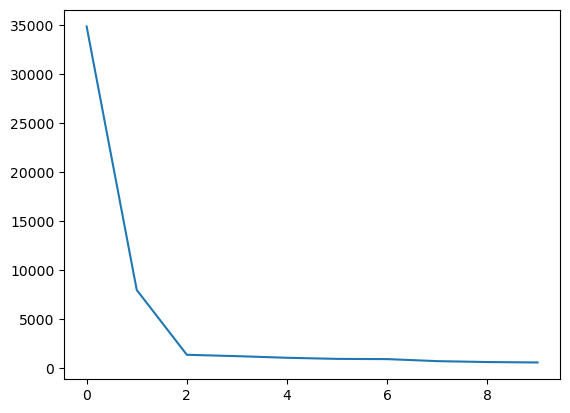

In [235]:
plt.plot(wcss)   ## counting stat with  0

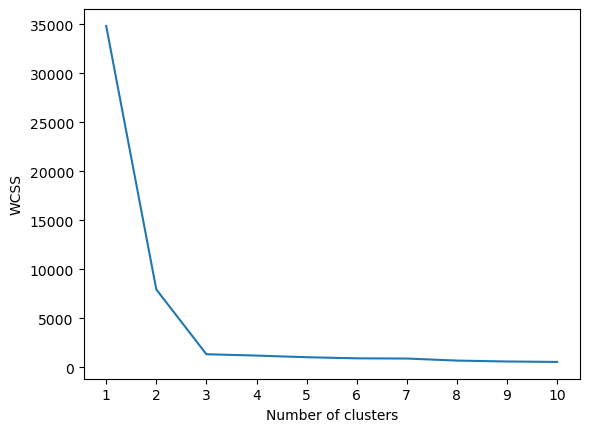

In [237]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [239]:
kmeans=KMeans(n_clusters=3)

In [241]:
y_label=kmeans.fit_predict(X_train)

C:\Users\p4pri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


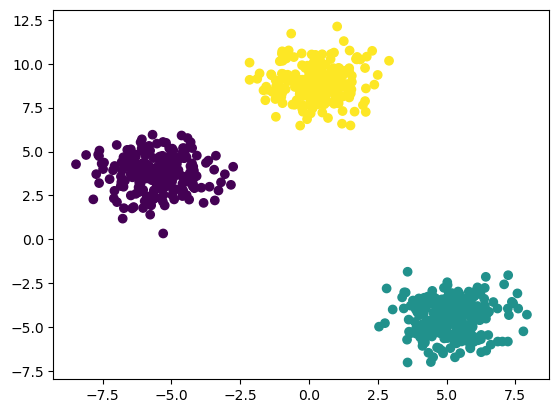

In [243]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

In [245]:
y_pred=kmeans.predict(X_test)
y_pred

array([2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 2, 1, 1, 2, 0, 2, 2, 2,
       1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 2, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       1, 2, 0, 0, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 1, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2,
       2, 0, 1, 0, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 1, 1, 1, 1, 2, 0, 0, 2,
       2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 0, 0,
       0, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 2, 2, 1, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 2, 0, 1, 0, 0, 1, 2, 1, 2, 0, 2,
       2, 0, 2, 1, 2, 2, 0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 2, 1, 1, 1, 2,
       1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 2, 1, 1,
       2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 2,

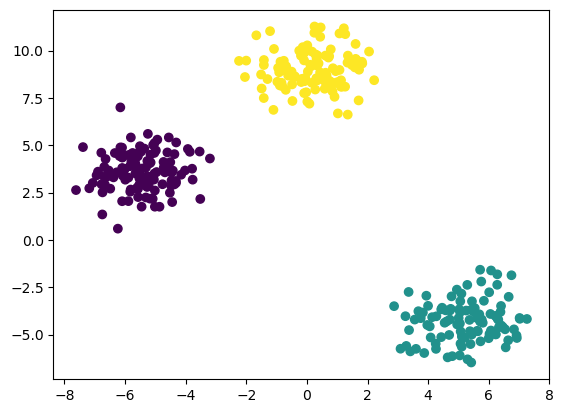

In [247]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [250]:
## Automate to finde K 


In [252]:
!pip install kneed

In [253]:
from kneed import KneeLocator

In [254]:
k1=KneeLocator(range(1,11),wcss ,curve= 'convex'    ,direction = 'decreasing')
k1.elbow

3

In [255]:
from sklearn.metrics import silhouette_score

In [256]:
silhouette_score(X_train,kmeans.labels_)

0.8071181203797672

In [262]:
kmeans.labels_

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 0, 2, 2, 0, 2,
       2, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 2, 2, 2, 0, 0, 1, 1, 0, 1, 1,
       0, 2, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 2, 2,
       2, 2, 0, 1, 2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 0, 1, 1, 0, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2, 1,
       0, 2, 1, 0, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 2, 2, 0, 2, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 2, 0,
       2, 1, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 0, 2,
       0, 1, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 1, 2, 0, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2,
       2, 0, 0, 1, 1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 0,

In [264]:
kmeans

KMeans(n_clusters=3)

In [271]:
silhouette_cofficient=[]
for i in range(2,11):
    kmeans=KMeans(n_clusters=i,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_cofficient.append(score)

C:\Users\p4pri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\p4pri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\p4pri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\p4pri\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [273]:
silhouette_cofficient

[0.7281443868598331,
 0.8071181203797672,
 0.6508334659314796,
 0.46874416045648987,
 0.3259236493459803,
 0.332803356557058,
 0.3448772288097187,
 0.33930443880497424,
 0.34595806577893073]

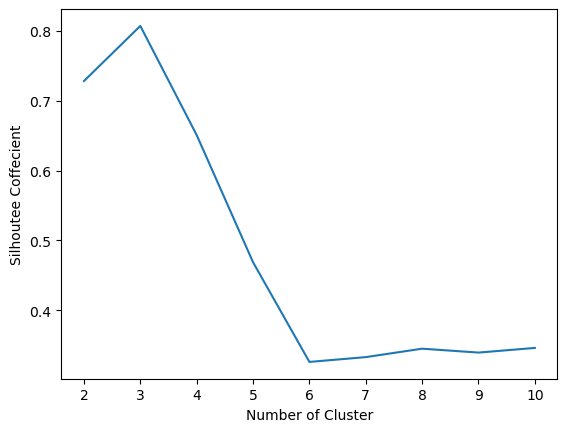

In [277]:
plt.plot(range(2,11),silhouette_cofficient)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluster")
plt.ylabel("Silhoutee Coffecient")
plt.show()